You'll be working with the MNIST digits recognition dataset, which has 10 classes, the digits 0 through 9! A reduced version of the MNIST dataset is one of scikit-learn's included datasets, and that is the one we will use in this exercise. (multi-class classification)

Each sample in this scikit-learn dataset is an 8x8 image representing a handwritten digit. Each pixel is represented by an integer in the range 0 to 16, indicating varying levels of black. Recall that scikit-learn's built-in datasets are of type Bunch, which are dictionary-like objects. Helpfully for the MNIST dataset, scikit-learn provides an 'images' key in addition to the 'data' and 'target' keys that you have seen with the Iris data. Because it is a 2D array of the images corresponding to each sample, this 'images' key is useful for visualizing the images.

In [1]:
# importing neccessary modules
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt


# Load the digits datasets
digits = datasets.load_digits()

print(digits.keys())
print(digits.DESCR) 


dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are di

In [2]:
# shapes of images and data
print(digits.images.shape)
print(digits.data.shape)

(1797, 8, 8)
(1797, 64)


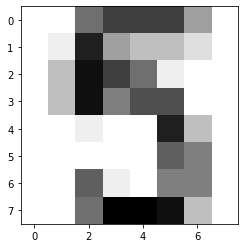

In [3]:
# Display the 1011th image using plt.imshow()

plt.imshow(digits.images[1010], cmap=plt.cm.gray_r, interpolation="nearest")
plt.show()

In [4]:
# Create feature and target arrays

X = digits.data                         # features
y = digits.target                       # labels

### Splitting into training and testing sets
Create stratified training and test sets using 0.2 for the size of the test set. Use a random state of 42. Stratify the split according to the labels so that they are distributed in the training and test sets as they are in the original dataset.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

### Training 
Create a k-NN classifier with 7 neighbors and fit it to the training data.

In [6]:
knn = KNeighborsClassifier(n_neighbors=4)

In [7]:
# fit classifier to the training data

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

Compute and print the accuracy of the classifier's predictions using the .score() method.

In [10]:
# Accuracy on the test set
knn.score(X_test, y_test)

0.9833333333333333

In [20]:
# Accuracy on the training set
knn.score(X_train, y_train)

0.9895615866388309

In [ ]:
X_train[]

In [27]:
knn.predict([[ 0.,  0., 11., 10., 12., 14., 11.,  0.,  0.,  0., 16., 16., 16.,
       16.,  7.,  0.,  0.,  1., 16., 16., 16., 12.,  0.,  0.,  0.,  1.,
        5.,  2., 11., 15.,  0.,  0.,  0.,  0.,  1.,  0.,  2., 16.,  0.,
        0.,  0.,  3., 12.,  0.,  3., 15.,  0.,  0.,  0.,  6., 15.,  8.,
       13., 11.,  0.,  0.,  0.,  0.,  9., 14.,  9.,  2.,  0.,  0.],
            ])

array([5])

You will now construct such a curve for the digits dataset! Compute and plot the training and testing accuracy scores for a variety of different neighbor values. By observing how the accuracy scores differ for the training and testing sets with different values of k, you will develop your intuition for overfitting and underfitting.

In [15]:
import numpy as np
neighbors = np.arange(1, 9)
neighbors

array([1, 2, 3, 4, 5, 6, 7, 8])

In [18]:
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(k)
    
    # Fit classifier to the training data
    knn.fit(X_train, y_train)
    
    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)
    


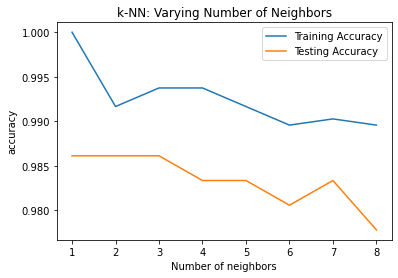

In [19]:
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, train_accuracy, label="Training Accuracy")
plt.plot(neighbors, test_accuracy, label="Testing Accuracy")
plt.legend()
plt.xlabel("Number of neighbors")
plt.ylabel("accuracy")
plt.show()